<h1 align="center"> Option Analysis </h1>
<h4 align="center"> Nicholas Han </h4>
<h4 align="center"> Spring 2018 </h4>

### 1. Generate Vol Surface

#### packages & files

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats
import matplotlib.pyplot as plt

#### data preprocessing

In [7]:
# read raw data frame, no Chinese characters allowed
data = pd.read_csv('50ETF_data_20170301to20180228.csv')

# remove dividend-adjusted contracts
valid_contracts = [x[11]=='M' for x in data['trade code']]
data = data[valid_contracts]

data['call_put'] = [x[6] for x in data['trade code']]
data['Date'] = [dt.datetime(year=x//10000, month=(x%10000)//100, day=x%100) for x in data['Date']]
data['expiration date'] = [dt.datetime(year=x//10000, month=(x%10000)//100, day=x%100) for x in data['expiration date']]

df = data[['Date','call_put','strike','spot close', 'close', 'expiration date', 'futures close']]
df.head()

,Date,call_put,strike,spot close,close,expiration date,futures close
1616,2017-03-01,C,2.3,2.368,0.0744,2017-03-22,2364.0
1617,2017-03-02,C,2.3,2.353,0.0591,2017-03-22,2347.2
1618,2017-03-03,C,2.3,2.343,0.0503,2017-03-22,2337.6
1619,2017-03-06,C,2.3,2.349,0.0527,2017-03-22,2341.8
1620,2017-03-07,C,2.3,2.354,0.0565,2017-03-22,2347.2


In [ ]:
dates = np.unique(df['Date'])
for date in dates:
    

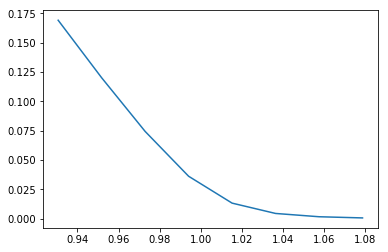

In [20]:
df_today = df[df['Date']=='2017-03-01']
spot_today = list(df_today['spot close'])[0]
futures_today = list(df_today['futures close'])[0]
df_today = df_today[['call_put','strike','close','expiration date', 'futures close']]
df_today_call = df_today[df_today['call_put']=='C']
df_today_put = df_today[df_today['call_put']=='P']

exp_dates = np.unique(df_today['expiration date'])
exp_date = exp_dates[0]

#for exp_date in exp_dates:
    # match strike
df_this_exp_call = df_today_call[df_today_call['expiration date']==exp_date]
df_this_exp_call = df_this_exp_call[['strike','close','futures close']]
df_this_exp_put = df_today_put[df_today_put['expiration date']==exp_date]
df_this_exp_put = df_this_exp_put[['strike','close']]
dd = df_this_exp_call.merge(df_this_exp_put, left_on='strike', right_on='strike', how='inner')
dd = dd.sort_values(by='strike')
dd['strike'] = dd['strike']*1000/futures_today
plt.plot(dd['strike'],dd['close_x'])
plt.show()

In [ ]:
# compute implied vol, let r be the implied rate from futures

In [4]:
# time series of matrices, x:K/F_0, y:Time to Maturity, z:time



#### volatility surface